In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [2]:
df = pd.read_csv('data/hiring.csv')

In [3]:
df.head(9)

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       6 non-null      object 
 1   test_score       7 non-null      float64
 2   interview_score  8 non-null      int64  
 3   salary           8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 388.0+ bytes


In [5]:
df.isnull().sum()

experience         2
test_score         1
interview_score    0
salary             0
dtype: int64

In [6]:
df.columns

Index(['experience', 'test_score', 'interview_score', 'salary'], dtype='object')

In [7]:
df['test_score']=df['test_score'].fillna(df['test_score'].median())

In [8]:
df.head(9)

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [9]:
data = {'experience': [np.nan, np.nan, 'five', 'two', 'seven', 'three', 'ten', 'eleven'],
        'test_score': [8, 8, 6, 10, 9, 7, 8, 7],
        'interview_score': [9, 6, 7, 10, 6, 10, 7, 8],
        'salary': [50000, 45000, 60000, 65000, 70000, 62000, 72000, 80000]}
df = pd.DataFrame(data)
word_to_number = {
    'five': 5,
    'two': 2,
    'seven': 7,
    'three': 3,
    'ten': 10,
    'eleven': 11
}
df['experience'] = df['experience'].replace(word_to_number).fillna(0)

In [10]:
df.head(9)

,experience,test_score,interview_score,salary
0,0.0,8,9,50000
1,0.0,8,6,45000
2,5.0,6,7,60000
3,2.0,10,10,65000
4,7.0,9,6,70000
5,3.0,7,10,62000
6,10.0,8,7,72000
7,11.0,7,8,80000


In [11]:
x=df.drop(columns=['salary'])
y=df['salary']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
x_test

,experience,test_score,interview_score
7,11.0,7,8
2,5.0,6,7


In [14]:
x_train

,experience,test_score,interview_score
4,7.0,9,6
5,3.0,7,10
3,2.0,10,10
0,0.0,8,9
6,10.0,8,7
1,0.0,8,6


In [15]:
y_test

7    80000
2    60000
Name: salary, dtype: int64

In [16]:
y_train

4    70000
5    62000
3    65000
0    50000
6    72000
1    45000
Name: salary, dtype: int64

In [17]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([76838.53138571, 55561.38965653])

In [18]:
pd.DataFrame({'y_test':y_test,'y_pred':y_pred,})

,y_test,y_pred
7,80000,76838.531386
2,60000,55561.389657


In [19]:
print('Intercept',model.intercept_)
print('Coef',model.coef_)
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Score',r2_score(y_test,y_pred))

Intercept 9744.176865377005
Coef [2711.80418476 2786.0244769  2220.2921437 ]
MSE: 14848072.790137526
RMSE: 3853.319710345552
R2 Score 0.8515192720986248


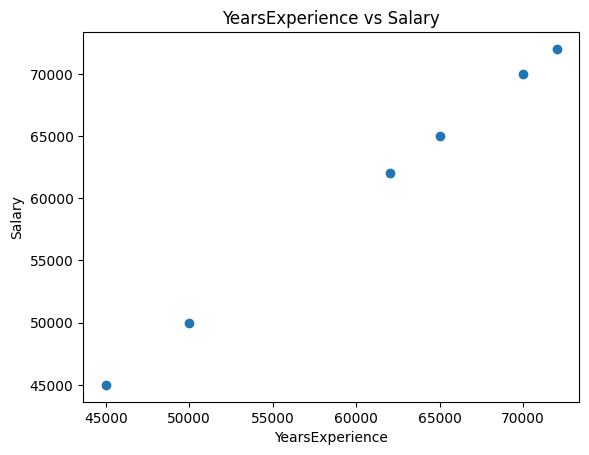

In [20]:
plt.scatter(y_train,y_train)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
#plt.plot(x_test,y_pred,color='red')
plt.title('YearsExperience vs Salary')
plt.show()